In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import csv

In [7]:
data = pd.read_csv("2.csv")
data

,Frequency (Hz),V0 (V),VL (mV),Phase shift (deg)
0,100,8,3.44,-44
1,200,8,5.36,-61
2,300,8,7.60,-70
3,400,8,9.84,-75
4,1000,8,23.80,-84
5,2000,8,47.20,-86
6,5000,8,118.00,-87


In [181]:
v0 = data["V0 (V)"]
vl = data["VL (mV)"]/1000
omega = data["Frequency (Hz)"] * 2 * np.pi
phase = (np.pi/2) + data["Phase shift (deg)"] * 2 * np.pi / 360

v0, vl, omega, phase

(0    8
 1    8
 2    8
 3    8
 4    8
 5    8
 6    8
 Name: V0 (V), dtype: int64,
 0    0.00344
 1    0.00536
 2    0.00760
 3    0.00984
 4    0.02380
 5    0.04720
 6    0.11800
 Name: VL (mV), dtype: float64,
 0      628.318531
 1     1256.637061
 2     1884.955592
 3     2513.274123
 4     6283.185307
 5    12566.370614
 6    31415.926536
 Name: Frequency (Hz), dtype: float64,
 0    0.802851
 1    0.506145
 2    0.349066
 3    0.261799
 4    0.104720
 5    0.069813
 6    0.052360
 Name: Phase shift (deg), dtype: float64)

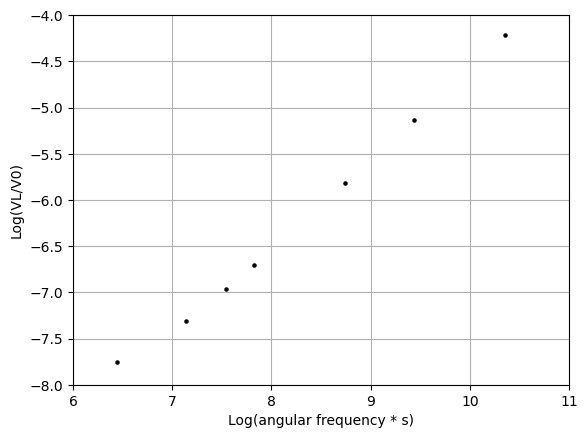

In [236]:
plt.xlabel("Log(angular frequency * s)")
plt.ylabel("Log(VL/V0)")
plt.grid()
plt.ylim(-8, -4)
plt.xlim(6, 11)
plt.scatter( np.log(omega), np.log(vl/v0), color="black", s=5 )
plt.show()

In [183]:
phase

0    0.802851
1    0.506145
2    0.349066
3    0.261799
4    0.104720
5    0.069813
6    0.052360
Name: Phase shift (deg), dtype: float64

In [221]:
def model(omega, A, tau):
    return A*omega*tau / np.sqrt(1 + (omega*tau)**2)
fit = sp.optimize.curve_fit(model, omega, vl/v0, p0=[1e-1, 4e-6])
fit

(array([1.17247786e-01, 4.03578527e-06]),
 array([[ 1.09029465e-02, -3.80378733e-07],
        [-3.80378733e-07,  1.32709172e-11]]))

In [223]:
[A_fit, tau_fit], cov = fit

A_fit, tau_fit

(0.1172477859733876, 4.035785274446751e-06)

In [225]:
[A_error, tau_error] = np.sqrt(np.diagonal(cov))
A_error, tau_error

(0.10441717547483481, 3.642927003812358e-06)

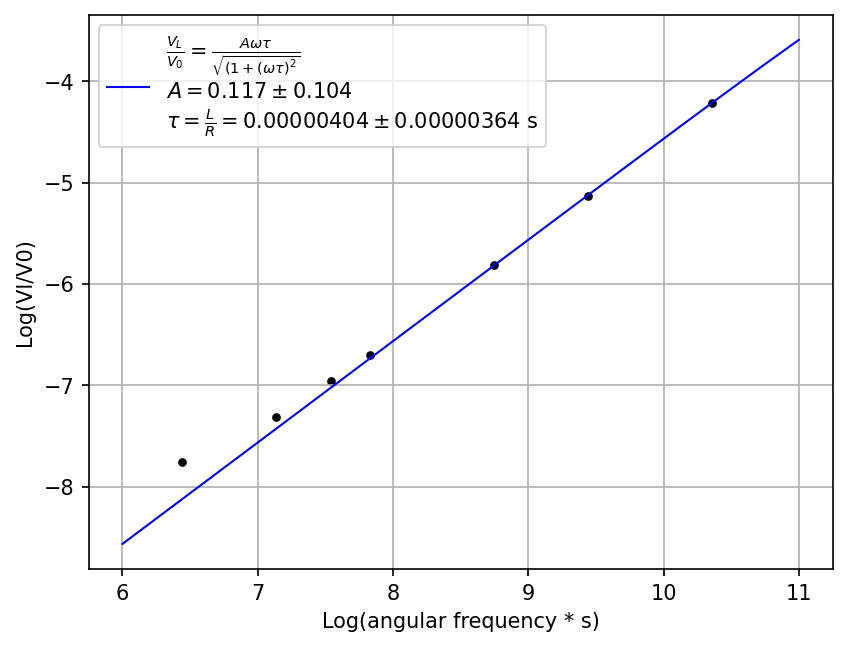

In [240]:
plt.figure(dpi=150)
plt.xlabel("Log(angular frequency * s)")
plt.ylabel("Log(Vl/V0)")
plt.grid()
# plt.ylim(-8, -4)
# plt.xlim(6, 11)
omega_fit = np.exp(np.linspace(6, 11, 20))
plt.plot( np.log(omega_fit), np.log( model(omega_fit, A_fit, tau_fit) ), c="blue", lw=1,
        label="\n".join([
            r"$\frac{V_L}{V_0} = \frac{A\omega\tau}{\sqrt{(1 + (\omega\tau)^2}}$",
            f"$A = {A_fit:.3f} \pm {A_error:.3f}$",
            f"$\\tau = \\frac{{L}}{{R}} = {tau_fit:.8f} \pm {tau_error:.8f}$ s",
        ]))
# plt.plot( np.log(omega_fit), np.log( model(omega_fit, 0.3, 0.00001) ), c="red", lw=1)
plt.scatter( np.log(omega), np.log(vl/v0), color="black", s=10)
plt.legend()
plt.show()

In [195]:
def model2(omega, tau):
    return np.arctan(tau/omega)

fit2 = sp.optimize.curve_fit(model2, omega, phase, p0=[0.1])
fit2

(array([674.03252066]), array([[221.76599011]]))

In [246]:
[tau_fit2], cov = fit2

tau_error2 = np.sqrt(cov[0][0])

tau_fit2, tau_error2

(674.0325206595675, 14.891809497654952)

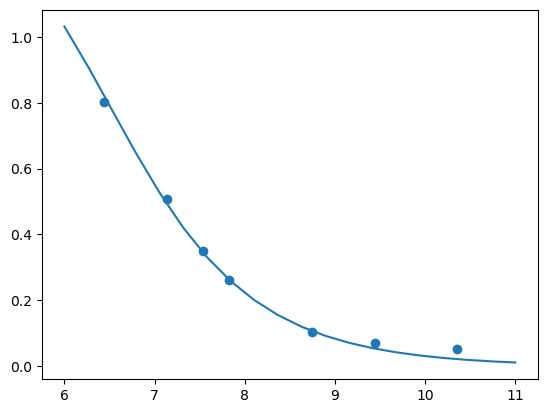

In [249]:
plt.scatter(np.log(omega), phase)
plt.plot(np.log(omega_fit), np.arctan(tau_fit2/omega_fit))

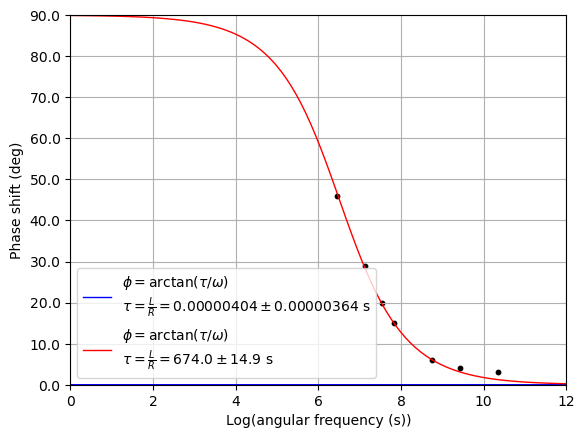

In [282]:
plt.scatter(np.log(omega), phase, c="black", s=10)
plt.xlim(0, 12)
plt.ylim(0, np.pi/2)
plt.yticks(np.linspace(0, np.pi/2, 10), np.linspace(0,90,  10))
plt.grid()
omega_fit = np.exp(np.linspace(0,12,100))
plt.plot(np.log(omega_fit), np.arctan(tau_fit/omega_fit), c="blue", lw=1,
                 label="\n".join([
            r"$\phi = \arctan(\tau/\omega)$",
            f"$\\tau = \\frac{{L}}{{R}} = {tau_fit:.8f} \pm {tau_error:.8f}$ s",
        ]))
plt.plot(np.log(omega_fit), np.arctan(tau_fit2/omega_fit), c="red", lw=1,
                 label="\n".join([
            r"$\phi = \arctan(\tau/\omega)$",
            f"$\\tau = \\frac{{L}}{{R}} = {tau_fit2:.1f} \pm {tau_error2:.1f}$ s",
        ]))
plt.legend()
plt.ylabel("Phase shift (deg)")
plt.xlabel("Log(angular frequency (s))")
plt.show()